<a href="https://colab.research.google.com/github/codeplinth/pytorchbootcamp/blob/master/PyTorch_33_Weights_Initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt

In [20]:
torch.manual_seed(0)

In [21]:
#make some data
X = torch.arange(-20,20,1).view(-1,1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [22]:
def plotData(X,Y,model,epoch,legend = True):
  plt.plot(X.numpy(),model(X).detach().numpy(),label = ('Epoch' + str(epoch)))
  plt.plot(X.numpy(),Y.numpy(),'r')
  plt.xlabel('x')
  if legend == True:
    plt.legend()
  else:
    pass

In [23]:
class NeuralNet(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(D_in,H)
    self.l2 = nn.Linear(H,D_out)
  
  def forward(self,x):
    out1 = torch.sigmoid(self.l1(x))
    y_pred = torch.sigmoid(self.l2(out1))
    return y_pred

In [24]:
def train_model(X,Y,model,criterion,optimzer,EPOCHS=1000):
  cost = []
  for epoch in range(EPOCHS):
    total = 0
    for x,y in zip(X,Y):
      y_pred = model(x)
      loss = criterion(y_pred,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total+=loss.item()
    cost.append(total)
    if epoch % 300 == 0:
      plotData(X,Y,model,epoch,legend = True)
      plt.show()
  return cost

In [25]:
model = NeuralNet(1,2,1)

In [26]:
model.state_dict()

OrderedDict([('l1.weight', tensor([[-0.0075],
                      [ 0.5364]])),
             ('l1.bias', tensor([-0.8230, -0.7359])),
             ('l2.weight', tensor([[-0.2723,  0.1896]])),
             ('l2.bias', tensor([-0.0140]))])

In [27]:
model.state_dict()['l1.weight'][0] = 1.0
model.state_dict()['l1.weight'][1] = 1.0
model.state_dict()['l1.bias'][0] = 0.0
model.state_dict()['l1.bias'][1] = 0.0
model.state_dict()['l2.weight'][0] = 1.0
model.state_dict()['l2.bias'][0] = 0.0

In [28]:
model.state_dict()

OrderedDict([('l1.weight', tensor([[1.],
                      [1.]])),
             ('l1.bias', tensor([0., 0.])),
             ('l2.weight', tensor([[1., 1.]])),
             ('l2.bias', tensor([0.]))])

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


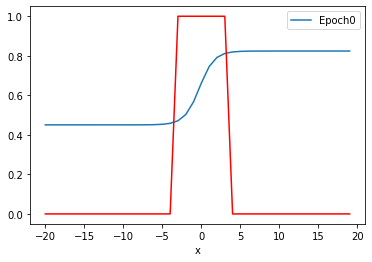

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


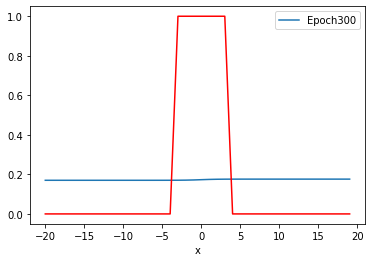

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


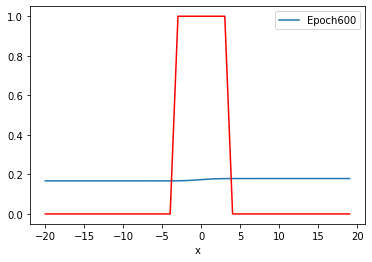

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


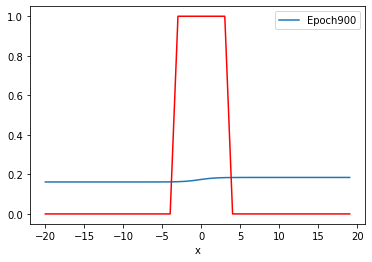

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


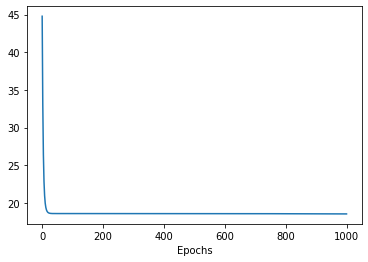

In [29]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr = 0.01)
cost = train_model(X,Y,model,criterion,optimizer)
plt.plot(cost)
plt.xlabel('Epochs')
plt.show()

In [30]:
model.state_dict()

OrderedDict([('l1.weight', tensor([[0.9841],
                      [0.9841]])),
             ('l1.bias', tensor([0.3722, 0.3722])),
             ('l2.weight', tensor([[0.0997, 0.0997]])),
             ('l2.bias', tensor([-1.6672]))])

In [31]:
y_pred=model(torch.tensor([[-2.0],[0.0],[2.0]]))
y_pred

tensor([[0.1633],
        [0.1752],
        [0.1846]], grad_fn=<SigmoidBackward>)